# Interpolation

In [2]:
import numpy as np                        # numerics
import matplotlib.pyplot as plt           # plotting
%matplotlib inline                        

## Key concept

* **Given** two arrays of $x_g$, $y_g$ data points (e.g., a plot of points).
* You **want** to estimate the $x_w$, $y_w$ value of an intermediate data point.
    * You know the value of $x_w$ (cause it's where you want the point).
    * **You need to interpolate to find the corresponding $y_w$.**


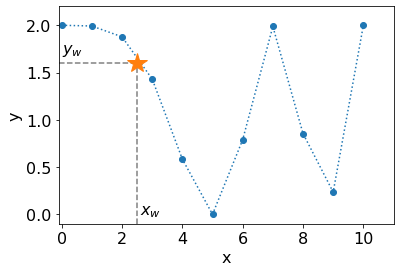

In [3]:
#### Just plotting some data to visualize

x_given = np.array([0,1,2,3,4,5,6,7,8,9,10])
y_given = np.cos(x_given**2.0/8.0) + 1

plt.rc('font', size=16)
plt.plot(x_given, y_given, 'o:')
plt.plot([2.5,2.5],[-0.1,1.6], '--', color='gray')
plt.plot([-0.1,2.5],[1.6,1.6], '--', color='gray')
plt.plot([2.5], [1.6], '*', markersize=20)
plt.xlim([-0.1,11])
plt.ylim([-0.1,2.2])
plt.xlabel('x')
plt.ylabel('y')
plt.text(2.6,0, r"$x_w$", fontsize=16)
plt.text(0,1.7, r"$y_w$", fontsize=16);

### Question
* How to get intermediate values, that is, **values between** those that are part of the given data?

### Answers
* Fit a curve to the data, then evaluate from that curve.
* Take the closest data point
* **Linear interpolation**
* **Higher order interpolation**
* (Others?)

### Question
* How does curve fitting differ from interpolation?


### Answer
* Normally, interpolation is done locally, between a **few** (often two) bounding points.
* Curve fitting involves making a best fit curve **everywhere**
    * Usually, a best-fit curve will not pass through all data points.
    * Useful when there is noise and we want the underlying curve, or a model equation for the data.
* Interpolation normally considers the points themselves, not a single curve through everything.
* Even with noisy data, we might want to interpolate an intermediate point.
* **If you want an intermediate point to some given data, use interpolation.**
* **If you want to fit a model though some scattered data, and then evaluate the model, use curve fitting.**

### Examples?
* Think of some examples where you might use this.

## Linear Interpolation Exercise

* Given the xg and yg data below. 
* Write a function called ```Linterp``` that takes the following arguments:
    * ```xg``` an array of **given** x data
    * ```yg``` an array of given y data corresponding to ```xg```
    * ```xw``` the value of x we **want** to interpolate at
* The function returns ```yw``` corresponding to ```xw```
* Assume ```xg``` are uniformly spaced, and ascending.

**Questions**
* What is the linear interpolation formula at a given location?
    

* We write the equation for a line based on two points, then evaluate the line at the intermediate point:
    * equate slopes, then solve for y_w:
    $$\frac{y_w-y_0}{x_w-x_0} = \frac{y_1-y_0}{x_1-x_0},$$
    $$y_w = y_0 + (x_w-x_0)\frac{y_1-y_0}{x_1-x_0}.$$

In [4]:
def Linterp(xg, yg, xw):
    dx = xg[1] - xg[0]
    i0 = int((xw-xg[0])/dx)
    i1 = i0 + 1
    
    yw = yg[i0] + (xw-xg[i0])*(yg[i1]-yg[i0])/(xg[i1]-xg[i0])
    return yw

#-------------------- Set some "given" x, y data, and print to screen
#----- This is normally provided, not explicitly set like we do here
    
xg = np.array([0,1,2,3,4,5,6,7,8,9,10.])   # given x data
yg = np.cos(xg**2.0/8.0)+1                 # given y data
print("xg = "+np.array2string(xg, formatter={'float_kind':lambda x: f"{x:4.2f}"}))
print("yg = "+np.array2string(yg, formatter={'float_kind':lambda x: f"{x:4.2f}"}))

#-------------------- interpolate to xw=2.5

xw = 2.5  
yw = Linterp(xg, yg, xw)
print("xw =", xw)
print("yw =", yw)

xg = [0.00 1.00 2.00 3.00 4.00 5.00 6.00 7.00 8.00 9.00 10.00]
yg = [2.00 1.99 1.88 1.43 0.58 0.00 0.79 1.99 0.85 0.24 2.00]
xw = 2.5
yw = 1.6543795393445195


### Scipy's interpolator

### New library

In [5]:
from scipy.interpolate import interp1d

* ```interp1d``` takes the given x array and the given y array as arguments.
* **Returns a function.** 
* Call that function wherever you want to interpolate to.

In [14]:
xg = np.array([0,1,2,3,4,5,6,7,8,9,10])   # given x data
yg = np.cos(xg**2.0/8.0)+1           # given y data

#---------------

f_interp = interp1d(xg, yg)

#---------------

xw = 2.5
yw = f_interp(xw)

print(yw)


1.6543795393445195


### Exercise
* Take the previous xg, yg data and plot the data as points.
* Plot 1000 points of the underlying function used to get xg and yg, called ```xx```
* Also, plot values of a linear interpolant at the same 1000 points.


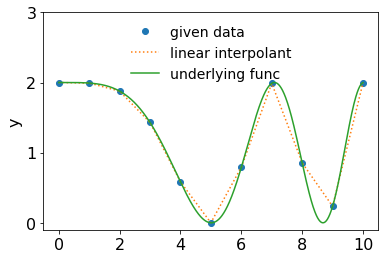

In [6]:
xg = np.array([0,1,2,3,4,5,6,7,8,9,10]) # given x data
yg = np.cos(xg**2.0/8.0)+1              # given y data

f_interp = interp1d(xg,yg)

xx      = np.linspace(0,10,1000)      # lots of points for 
yy      = np.cos(xx**2.0/8.0)+1       # ploting the underlying function

xw = xx              # evaluate the linear interp at all xx points
yw = f_interp(xw)    # call f_interp on the WHOLE ARRAY of xw points

plt.plot(xg, yg,         'o',label='given data')
plt.plot(xx,f_interp(xx),':',label='linear interpolant')
plt.plot(xx,yy          ,'-',label='underlying func')
plt.ylabel('x')
plt.ylabel('y')
plt.ylim([-0.1,3])
plt.legend(loc='best', frameon=False, fontsize=14);

#### Try replacing 
```f_interp = interp1d(xg, yg)```
#### with this
```f_interp = interp1d(xg, yg, kind='cubic')```

* This uses a *cubic spline* interpolant instead of a linear interpolant.
    * That is, we use cubic functions between points that match up smoothly at interfaces.


**Try this:**
* Interpolate an ```x``` value that is outside of the bounds of the given ```xg``` data.
* What happens?

### Extrapolation

* As listed above, you will get an error if you try to call ```f_interp``` with an ```x``` value that is outside of the upper and lower bounds of the original ```xg``` array.
* This can be avoided using the ```fill_value='extrapolate'``` argument, like so:
    * ```f_interp = interp1d(xg, yg, fill_value='extrapolate'```

## Summary
1. Import library
1. You have some data from somewhere, ```xg```, ```yg```
1. Get ther interpolant function ```fi=interp1d(xg, yg)```
1. Set desired ```xw``` intermediate points to interpolate at (can be an array).
1. Perform the interpolation to ```yw=fi(xw)```

In [7]:
from scipy.interpolate import interp1d

xg = np.array([1,2,3,4,5])             # some data you have
yg = np.array([11, 2.2, 3.3, -88, 9])

fi = interp1d(xg,yg)
xw = 2.5
yw = fi(xw)

## Question
* What if you have given ```xg``` and ```yg``` arrays and you know the ```yw``` and want to interpolate to the corresponding ```xw```?